# Task 3: Modeling optimization

In [2]:
import pandas as pd
import os
from pathlib import Path
import seaborn as sns  
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import statsmodels.api as sm
import missingno as msno
from sklearn import linear_model
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, ConfusionMatrixDisplay


## Import Data

In [3]:

df_train = pd.read_csv('../../data/processed/triathlon_watch_training_preprocessed_samu_prep_0.csv')
# OneHot-Encoding for categorical columns
df_train = pd.get_dummies(df_train, columns=df_train.select_dtypes(include=['object']).columns.to_list(), drop_first=True)

In [4]:
# Define features X and label y
X = df_train.drop('user_of_latest_model', axis=1)
y = df_train['user_of_latest_model']

In [5]:
#train test split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=17)

Accuracy: 0.701530612244898
F1-Score: 0.6006825938566553


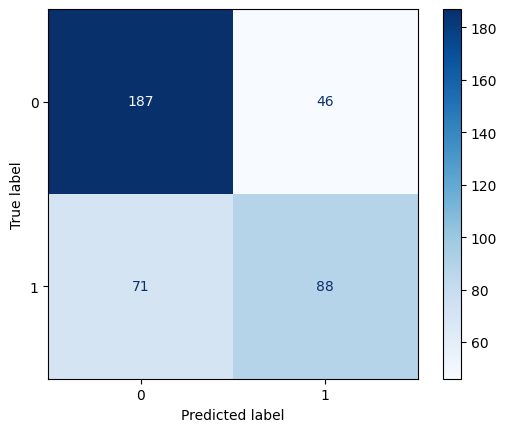

In [6]:
# simple classification tree
from sklearn import tree

#initialize model
dt = tree.DecisionTreeClassifier()

#fit model to training data
dt.fit(x_train,y_train)

# Make predictions on the validation data
y_pred = dt.predict(x_test)

# Calculate accuracy and F1-score
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the results
print("Accuracy:", accuracy)
print("F1-Score:", f1)

# Display the confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.show()

Accuracy: 0.75
F1-Score: 0.6666666666666666


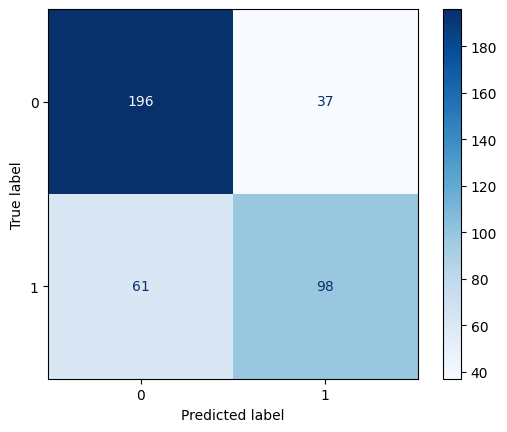

In [7]:
#Gradient Boosted Tree
from sklearn.ensemble import GradientBoostingClassifier

#initialize model
gbt = GradientBoostingClassifier(n_estimators=100, max_depth=4, learning_rate=1.0,random_state=0)

#fit model to training data
gbt.fit(x_train,y_train)

# Make predictions on the validation data
y_pred = gbt.predict(x_test)

# Calculate accuracy and F1-score
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the results
print("Accuracy:", accuracy)
print("F1-Score:", f1)

# Display the confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.show()

Accuracy: 0.7346938775510204
F1-Score: 0.6486486486486487


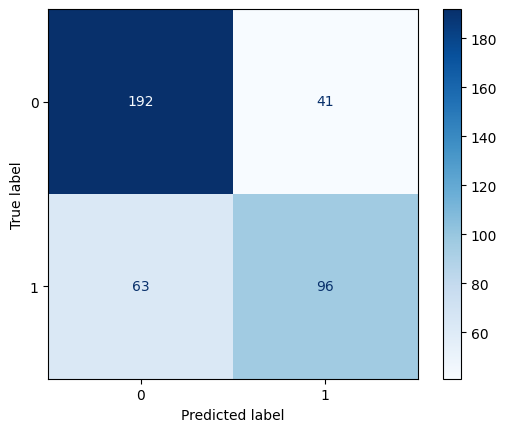

In [8]:
#Bagging Tree
from sklearn.ensemble import BaggingClassifier

bagt= BaggingClassifier(tree.DecisionTreeClassifier(),n_estimators=10, random_state=0)

# Fit the model to the training data
bagt.fit(x_train, y_train)

# Make predictions on the validation data
y_pred = bagt.predict(x_test)

# Calculate accuracy and F1-score
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the results
print("Accuracy:", accuracy)
print("F1-Score:", f1)

# Display the confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.show()

In [9]:
from sklearn.svm import SVC

# Initialize DataFrame to store results
df_kernel_comparison = pd.DataFrame(columns=['Kernel', 'Accuracy', 'F1-Score'])

for kernel in ['linear', 'poly', 'rbf', 'sigmoid']:

    # Initialisiere das SVM-Modell mit einem linearen Kernel
    svm_model = SVC(kernel= kernel)

    # Trainiere das Modell mit den Trainingsdaten
    svm_model.fit(x_train, y_train)

    # Make predictions on the validation data
    y_pred = svm_model.predict(x_test)

    # Berechne Accuracy und F1-Score
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Store results in DataFrame
    new_row = pd.DataFrame({'Kernel': [kernel], 'Accuracy': [accuracy], 'F1-Score': [f1]})
    
    # Check whether df_kernel_comparison is empty
    if df_kernel_comparison.empty:
        df_kernel_comparison = new_row  # Directly assign if df_kernel_comparison is empty
    else:
        df_kernel_comparison = pd.concat([df_kernel_comparison, new_row], ignore_index=True)

df_kernel_comparison


,Kernel,Accuracy,F1-Score
0,linear,0.762755,0.719033
1,poly,0.653061,0.333333
2,rbf,0.658163,0.446281
3,sigmoid,0.397959,0.276074


## Test the best model on Test set

In [10]:
x_train = df_train.drop('user_of_latest_model', axis=1)

x_test = df_test.drop('user_of_latest_model', axis=1)

y_train = df_train['user_of_latest_model']
 
y_test = df_test['user_of_latest_model']

NameError: name 'df_test' is not defined

In [90]:
df_test = pd.read_csv('../../data/processed/triathlon_watch_test_preprocessed_samu.csv')
df_test = pd.get_dummies(df_test, columns=df_test.select_dtypes(include=['object']).columns.to_list(), drop_first=True)